In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import re
#import en_core_web_sm
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np #For divergences/distances
import scipy as sp#For divergences/distances
import sklearn.manifold #For a manifold plot
import urllib.parse #For joining urls
import matplotlib.colors
import graphviz 
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import collections
import os.path
import random
import glob
import requests
import json
import math
import networkx as nx
import logging
import pickle #if you want to save layouts

%matplotlib inline
import en_core_web_sm
nlp = en_core_web_sm.load()
#from textblob import TextBlob
import sys
#import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('fivethirtyeight')
import matplotlib.ticker as mticker
from scipy import stats
import sklearn.feature_extraction
from networkx.algorithms.community import greedy_modularity_communities

import emoji

#Courtesy of Computational-Content-Analysis-2020. This package is not up-to-date at the link and will take some alteration locally
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


import random
import pandas as pd
import numpy as np
from multiprocessing import  Pool





In [2]:
files = [#'Apr2020',
#'Feb2021',
#'Jun2020',
#'Nov2020',
#'May2020',
#'Mar2021',
#'Apr2021',
#'Oct2020',
#'Jul2021',
#'Sep2020',
#'Sep2021',
#'Aug2020',
#'May2021',
#'Dec2020',
#'Feb2020',
#'Aug2021',
#'Jan2021',
#'Jan2020',
#'Jan2022',
#'Jun2021',
#'Feb2022',
#'Oct2021',
#'Jul2020',
#'Nov2021',
#'Mar2020',
'Dec2021',]

Dec2021
Graph with 1787 nodes and 6545 edges
Graph with 1649 nodes and 6435 edges
Graph with 1649 nodes and 6435 edges
11
Graph with 1482 nodes and 5596 edges
12
Graph with 1308 nodes and 4976 edges
13
Graph with 1228 nodes and 4456 edges
14
Graph with 1151 nodes and 4011 edges
15
Graph with 1083 nodes and 3603 edges
16
Graph with 1031 nodes and 3337 edges
17
Graph with 950 nodes and 3058 edges
18
Graph with 894 nodes and 2863 edges
19
Graph with 850 nodes and 2693 edges
20
Graph with 814 nodes and 2523 edges
21
Graph with 778 nodes and 2372 edges
22
Graph with 742 nodes and 2254 edges
23
Graph with 715 nodes and 2138 edges
24
Graph with 694 nodes and 2022 edges
25
Graph with 671 nodes and 1918 edges
26
Graph with 640 nodes and 1821 edges
27
Graph with 626 nodes and 1737 edges
28
Graph with 597 nodes and 1644 edges
29
Graph with 561 nodes and 1543 edges
30
Graph with 544 nodes and 1476 edges
31
Graph with 514 nodes and 1401 edges
32
Graph with 488 nodes and 1325 edges
33
Graph with 465

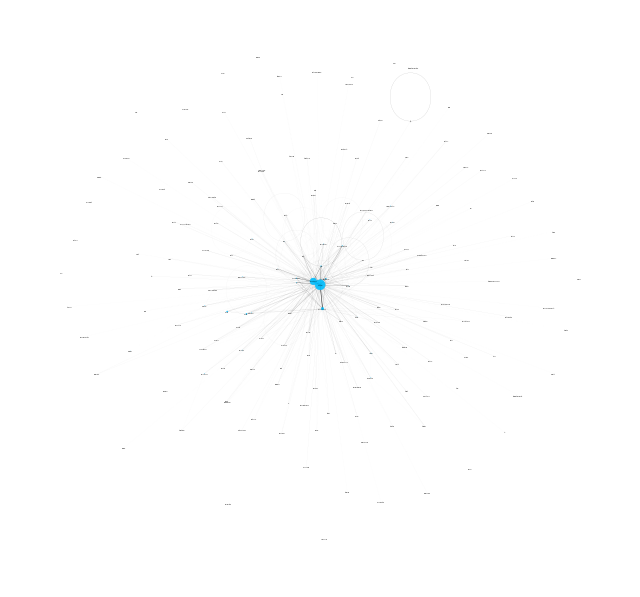

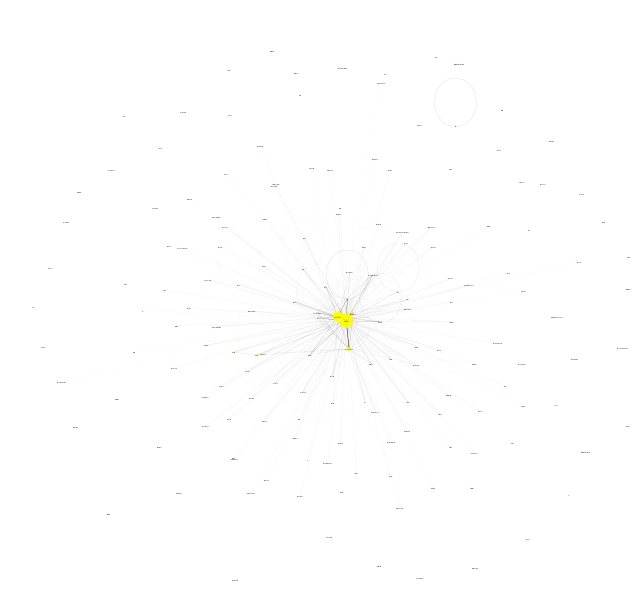

In [3]:
weight = 11











for f in files:
    

    
    print(f)
    
    comment_DF = pd.read_csv("%s.csv" %f)
    len(comment_DF)
    logger = logging.getLogger("spacy")
    logger.setLevel(logging.ERROR)
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    
    #Cleaning CLEAN MORE
    def cleanTxt(text):
        
        text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) #
        text = re.sub(r'#', '', text)
        text = re.sub(r'RT[\s]+', '', str(text))
        text = re.sub(r'https?:\/\/\S+', '', str(text))
        text = re.sub(r'>', '', str(text))
        text = re.sub(r'<', '', str(text))
        text = re.sub(r'=', '', str(text))
        text = re.sub(r'|', '', str(text))
        text = re.sub(r'jeffrey', '', str(text))
        text = re.sub(r'epstein', '', str(text))
        text = re.sub(r'et', '', str(text))
        text = re.sub(r'al', '', str(text))
        text =  re.sub(emoji.get_emoji_regexp(), r"", text)
        text = emoji_pattern.sub(r'', text)
    
        return text
    
    def cleanit(comment_DF):
        comment_DF['comment'] = comment_DF['comment'].apply(cleanTxt)
        return comment_DF

    
    def parallelize_dataframe(comment_DF, func, n_cores=48):
        df_split = np.array_split(comment_DF, n_cores)
        pool = Pool(n_cores)
        comment_DF = pd.concat(pool.map(func, df_split))
        pool.close()
        pool.join()
        return comment_DF
    
    comment_DF = parallelize_dataframe(comment_DF, cleanit)
    
    def tokeandnorm(comment_DF):
        comment_DF['tokenized_sents'] = comment_DF['comment'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
        comment_DF['normalized_sents'] = comment_DF['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])
        return comment_DF

    
    def parallelize_dataframe(comment_DF, func, n_cores=48):
        df_split = np.array_split(comment_DF, n_cores)
        pool = Pool(n_cores)
        comment_DF = pd.concat(pool.map(func, df_split))
        pool.close()
        pool.join()
        return comment_DF
    
    comment_DF = parallelize_dataframe(comment_DF, tokeandnorm)
    
    def wordCooccurrence(sentences, makeMatrix = False):
        words = set()
        for sent in sentences:
            words |= set(sent)
        wordLst = list(words)
        wordIndices = {w: i for i, w in enumerate(wordLst)}
        wordCoCounts = {}
        #consider a sparse matrix if memory becomes an issue
        coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
        for sent in sentences:
            for i, word1 in enumerate(sent):
                word1Index = wordIndices[word1]
                for word2 in sent[i + 1:]:
                    coOcMat[word1Index][wordIndices[word2]] += 1
        if makeMatrix:
            return coOcMat, wordLst
        else:
            coOcMat = coOcMat.T + coOcMat
            g = nx.convert_matrix.from_numpy_matrix(coOcMat)
            g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
            return g
        
    def add_features(comment_DF):
            g = wordCooccurrence(comment_DF['normalized_sents'].sum())
            return g

    def squish_graphs(graph_list):
        ret_graph = graph_list[0]
        for graph in graph_list:
            ret_graph = nx.compose(ret_graph, graph)
        
        return ret_graph

    def parallelize_dataframe(comment_DF, func, n_cores=48):
        df_split = np.array_split(comment_DF, n_cores)
        pool = Pool(n_cores)
        g = squish_graphs(pool.map(func, df_split))
        pool.close()
        pool.join()
        return g
    
    g = parallelize_dataframe(comment_DF, add_features)
    
    g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= weight])
    g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
    print(nx.info(g))
    
    def connected_component_subgraphs(G):
        for c in nx.connected_components(G):
            yield G.subgraph(c)
            
    giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
    print(nx.info(giant))
    
    while giant.number_of_nodes() > 170:
        g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= weight])
        g.remove_nodes_from(list(nx.isolates(g)))
        giant = max(connected_component_subgraphs(g), key=len) 
    
        print(nx.info(giant))
        print(weight)
        weight = weight + 1
    
       
    else:
        print("You're good bra!")
        
        
    
    dcentralities = nx.degree_centrality(giant)
    
    x = sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)
    NW = pd.DataFrame(x, columns=['Node', 'Weight'])
    NW.to_csv('DCentrality_%s.csv' %f)

    
    between = nx.betweenness.betweenness_centrality(giant)
    
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)

    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(between.items(), key = lambda x : x[1])[1]
    maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
    minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
            alpha = .9,
            font_size = 2,
            node_color = 'deepskyblue',
            node_size = [between[n] / maxC * 100 for n in giant.nodes],
            cmap = plt.get_cmap('gist_rainbow'))
    plt.savefig('Betweeness_%s.jpg' %f, dpi=300)


    
    
    x = (sorted(between.items(), key = lambda x: x[1], reverse = True))
    NW = pd.DataFrame(x, columns=['Node', 'Weight'])
    NW.to_csv('Betweeness_%s.csv' %f)
    
    VaxEgo = giant.subgraph(['vaccine'] + list(giant.neighbors('vaccine')))
    print(nx.info(VaxEgo))
    
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(between.items(), key = lambda x : x[1])[1]
    maxWeight = max((d['weight'] for n1, n2, d in VaxEgo.edges(data = True)))
    minWeight = min((d['weight'] for n1, n2, d in VaxEgo.edges(data = True)))
    nx.draw(VaxEgo, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in VaxEgo.edges(data = True)], 
            alpha = .9,
            font_size = 2,
            node_color = 'yellow',
            node_size = [between[n] / maxC * 200 for n in VaxEgo.nodes],
            cmap = plt.get_cmap('rainbow'))
    plt.savefig('VacEgo_%s.jpg' %f, dpi=300)
    
    gTrans = nx.transitivity(giant)
    
    eTrans = nx.transitivity(VaxEgo)
    
    numbers = pd.read_csv('numbers.csv')
    
    numbers = numbers.append({'Date':f,
                               'Giant_Transitivity':gTrans,
                               'Ego_Transitivity':eTrans,
                               'Giant_Density':nx.density(giant),
                               'Ego_density':nx.density(VaxEgo),
                              'Weight_threshold': weight},
                              ignore_index=True)
    
    numbers.to_csv('numbers.csv')
    
    cGiant = list(greedy_modularity_communities(giant))
    cEgo = list(greedy_modularity_communities(VaxEgo))
    
    EL = pd.DataFrame(VaxEgo.edges, columns=['source', 'target'])
    NL = pd.DataFrame(VaxEgo.nodes, columns=['Node'])
    EL.to_csv('VaxEgo_EL_%s.csv' %f)
    NL.to_csv('VaxEgo_NL_%s.csv' %f)
    
    EL = pd.DataFrame(giant.edges, columns=['source', 'target'])
    NL = pd.DataFrame(giant.nodes, columns=['Node'])
    EL.to_csv('Giant_EL_%s.csv' %f)
    NL.to_csv('Giant_NL_%s.csv' %f)
    